In [1]:
# Step 1 & Step 2: Load and Preprocess the Iris Dataset

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Labels: 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y  # Add target labels

# Display first few rows
print(df.head())

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features using StandardScaler (Zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print dataset shapes
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Training data shape: (120, 4), Test data shape: (30, 4)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input layer with 10 neurons
    Dense(8, activation='relu'),  # Hidden layer with 8 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons (one for each class)
])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer for training
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Measure accuracy during training
)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3318 - loss: 1.8364 - val_accuracy: 0.3333 - val_loss: 1.4598
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3600 - loss: 1.3720 - val_accuracy: 0.3333 - val_loss: 1.2087
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3463 - loss: 1.1788 - val_accuracy: 0.3333 - val_loss: 1.1016
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 - loss: 1.1279 - val_accuracy: 0.3333 - val_loss: 1.0679
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3496 - loss: 1.0772 - val_accuracy: 0.3333 - val_loss: 1.0392
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3225 - loss: 1.0436 - val_accuracy: 0.4667 - val_loss: 1.0021
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4596 - loss: 1.0262 - val_accuracy: 0.6667 - val_loss: 0.9553
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6103 - loss: 0.9464 - val_accuracy: 0.6667 - val_loss

In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - accuracy: 0.9333 - loss: 0.1310
Test Accuracy: 0.9333
Test Loss: 0.1310


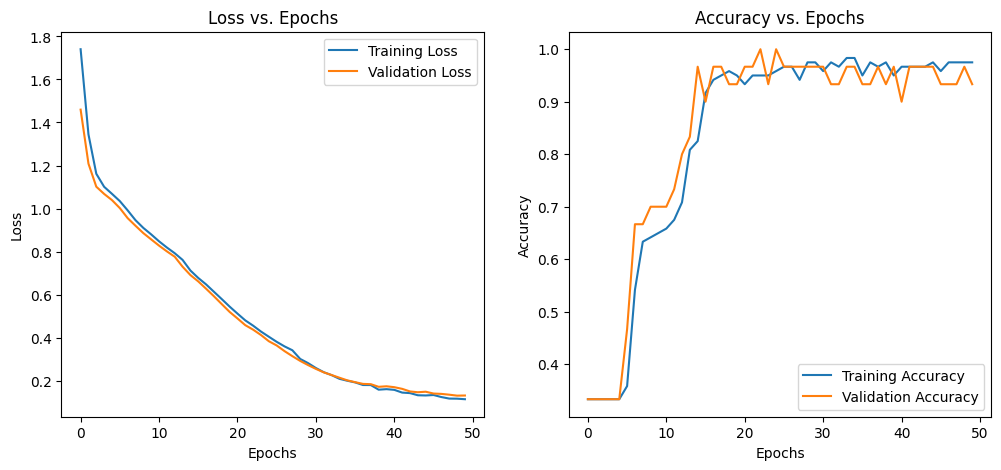

In [7]:
import matplotlib.pyplot as plt

# Get training & validation loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.show()


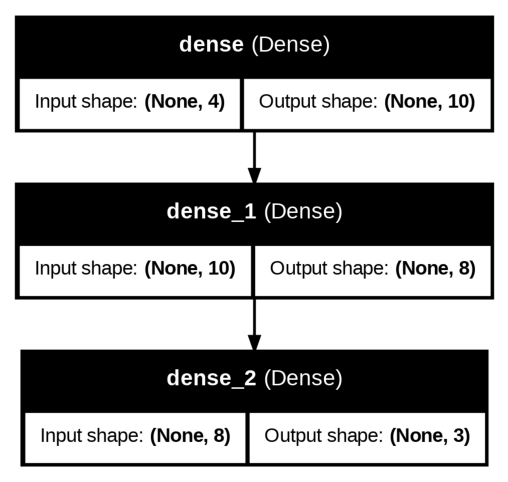

In [8]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Plot the model architecture
plot_model(model, to_file="model_structure.png", show_shapes=True, show_layer_names=True)

# Display the saved model structure image
img = plt.imread("model_structure.png")
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()
